In [18]:

# ppl_plots = {}
# for k in ['Llama3-8B', 'Llama2-7B', 'Llama2-13B', 'Llama3.2-3B']:
#     save_path = f'./bit_plot_data/{k}.json'
#     with open(save_path, 'r') as f:
#         data = json.load(f)
#     ppl_plots[k] = data

In [19]:
# PPL
import glob
import json
import re

# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b_shuffled'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b_shuffle_7b'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b_7b_droplast'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/gaussian'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/gaussian_7b_droplast'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/gaussian_8b'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Meta-Llama-3-8B/ql_no_norm'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_7b_droplast'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b_clip'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b_row_norm'
# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/meta-llama--Llama-2-7b-hf/ql_8b_col_norm'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_d_8b+7b'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_d_8b_kde'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_d_8b+7b_droplast_modelnorm'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_d_8b_ldlq256_rnorm'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_d_8b_naive_code_edit'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_d_8b_naive_code_edit100_round'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_code_optim200_rnorm'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_code_optim200_rnorm_init'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_code_optim200_rnorm_sga'
# path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_code_optim200_rnorm_round'
path = '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_ldlq128_rnorm_ft'
listdir = glob.glob(f'{path}/*result.json')
# print(listdir[:1])
c4ppl = []
wikippl = []
bits = []
bpp = []
for file in listdir:
    # bit = re.search(r'w(\d+)', file.lower()).group(1)
    # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
    # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
    with open(file, 'r') as f:
        results = json.load(f)
        # if int(bit) < 5: continue
        # bits.append(int(bit))
        
        bpp.append(results['bpp_loss'])
        wikippl.append(results['ppl']['wikitext2'])
        c4ppl.append(results['ppl']['c4'])
        
        # wikippl.append(results['wikitext2'])
        # c4ppl.append(results['c4'])
if bpp != []:
    sorted_indices = sorted(range(len(bpp)), key=lambda i: bpp[i])
    bpp = [bpp[i] for i in sorted_indices]
elif bits != []:
    sorted_indices = sorted(range(len(bits)), key=lambda i: bits[i])
    bits = [bits[i] for i in sorted_indices]
    
if wikippl != []:
    wikippl = [wikippl[i] for i in sorted_indices]
if c4ppl != []:
    c4ppl = [c4ppl[i] for i in sorted_indices]

print("['bpp'] = ", bpp)
print("['bpp'] = ", bits)
print("['ppl_wikitext2'] = ", wikippl)
print("['ppl_c4'] = ", c4ppl)

listdir = glob.glob(f'{path}/**/*.json', recursive=True)
# print(listdir)
# listdir = [path]
# filtered_list = [f for f in listdir if 'harness_results' in f]
filtered_list = [f for f in listdir if 'zeroshot_results' in f]
# filtered_list = [f for f in listdir if 'zeroshot' in f]
listdir = filtered_list
# print(listdir)

acc = []
bits = []
lmbda = []
for file in listdir:
    lmbda_values = re.search(r'lmbda(\d+)', file).group(1)
    # bit = re.search(r'w(\d+)', file).group(1)
    # bit = re.search(r'8b_(\d+)', file).group(1)
    with open(file, 'r') as f:
        results = json.load(f)
        mean = 0
        for task in ['arc_challenge', 'arc_easy', 'boolq', 'piqa', 'winogrande']:
            mean += results['results'][task]['acc,none']
            # mean += results['results'][task]['acc']
        mean /= 5
        lmbda.append(int(lmbda_values))
        # bits.append(int(bit))
        acc.append(mean)
if lmbda != []:
    sorted_indices = sorted(range(len(lmbda)), key=lambda i: lmbda[i])
    lmbda = [lmbda[i] for i in sorted_indices]
elif bits != []:
    sorted_indices = sorted(range(len(bits)), key=lambda i: bits[i])
    bits = [bits[i] for i in sorted_indices]
acc = [acc[i] for i in sorted_indices]

print("['bpp'] = ", bits)
print("['lmbda'] = ",lmbda)
print("['zeroshot'] = ",acc)

['bpp'] =  [2.3015328621482833, 2.6693616848877775, 3.16721133423002, 3.954826640797994, 4.77782450354873, 5.9810235201596065]
['bpp'] =  []
['ppl_wikitext2'] =  [8.403983116149902, 7.251631259918213, 6.6762261390686035, 6.31689453125, 6.193994998931885, 6.15234375]
['ppl_c4'] =  [11.731051445007324, 10.42491340637207, 9.59599781036377, 9.087160110473633, 8.944413185119629, 8.895471572875977]
['bpp'] =  []
['lmbda'] =  [30, 50, 100, 300, 1000, 10000]
['zeroshot'] =  [0.6837428048045503, 0.711155642760884, 0.7220614639150719, 0.7316054281153441, 0.7312745842563112, 0.7300477303109602]


/tmp/ipykernel_4063710/3144895391.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


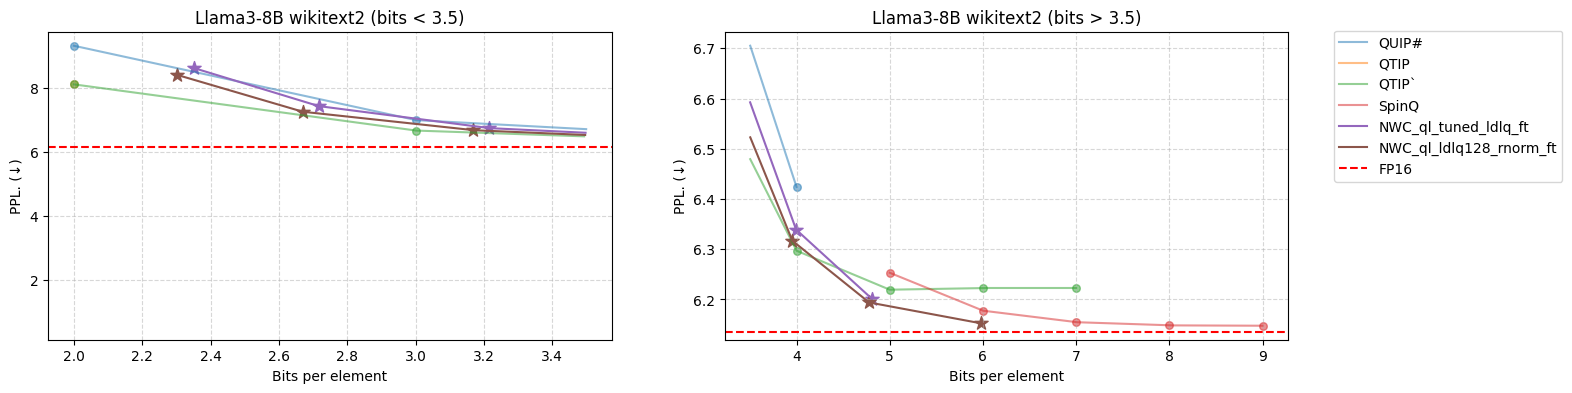

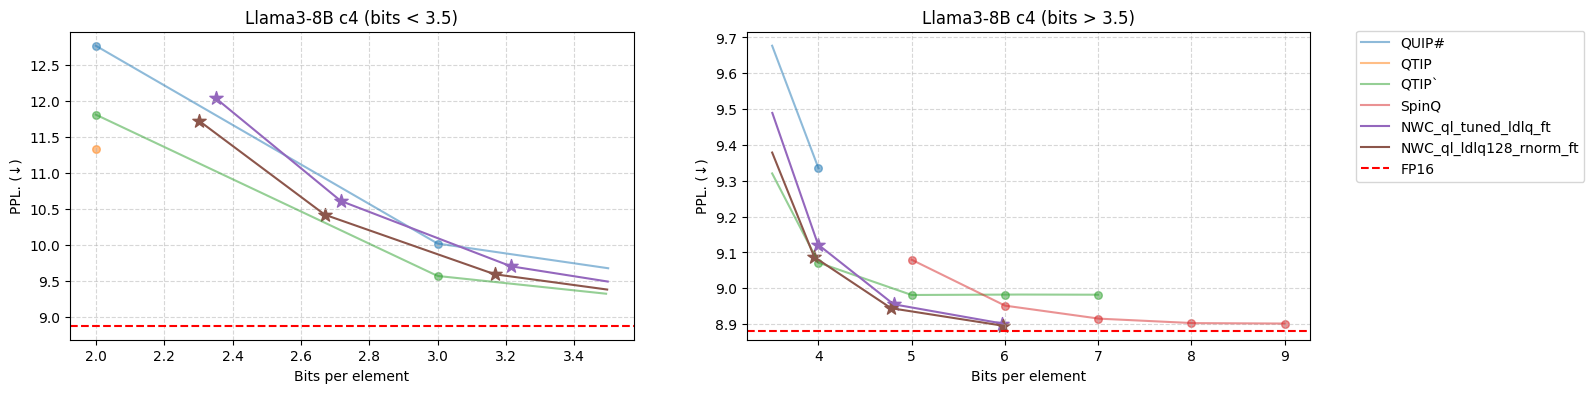

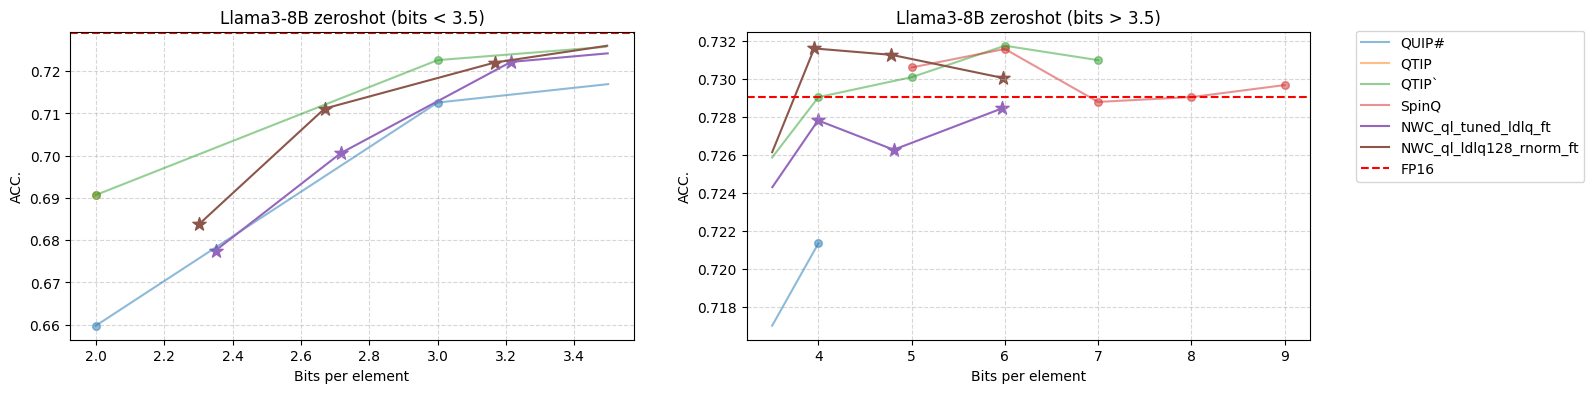

'QTIP`'
'SpinQ'
'NWC_ql_tuned_ldlq_ft'
'NWC_ql_ldlq128_rnorm_ft'


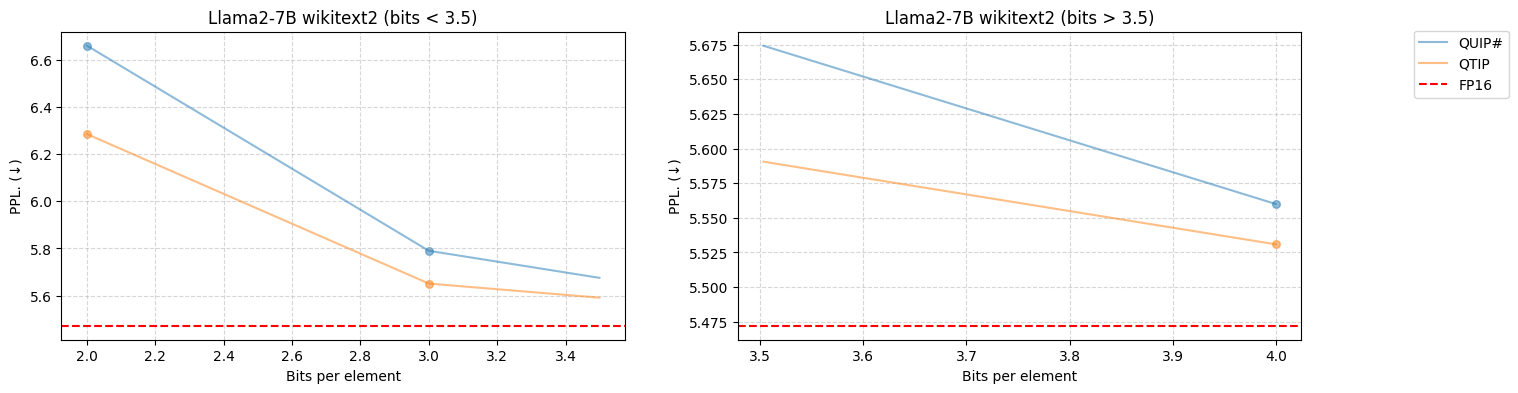

'ppl_c4'
'ppl_c4'
'QTIP`'
'SpinQ'
'NWC_ql_tuned_ldlq_ft'
'NWC_ql_ldlq128_rnorm_ft'


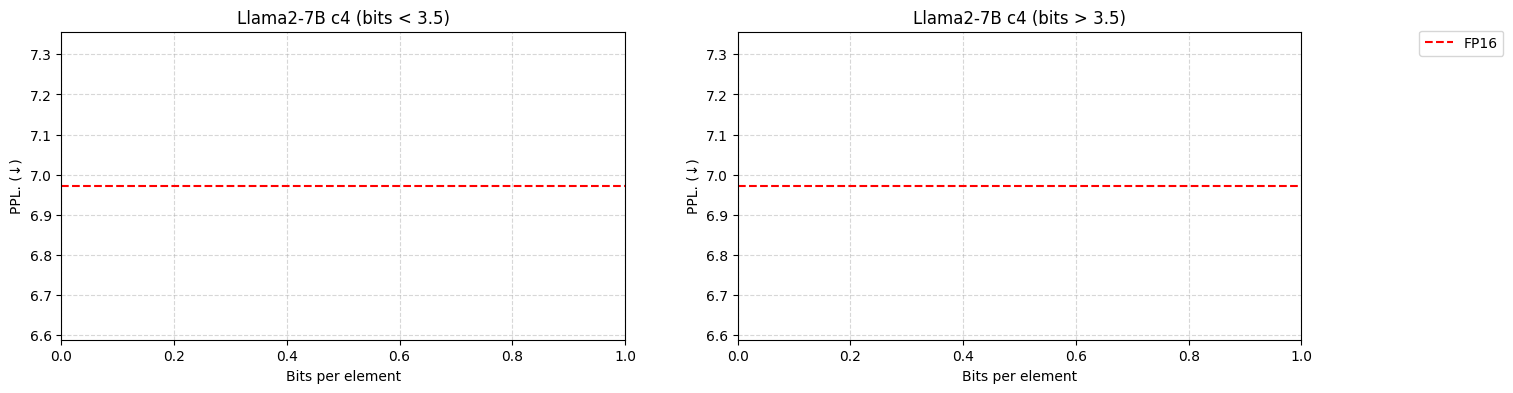

'zeroshot'
'zeroshot'
'QTIP`'
'SpinQ'
'NWC_ql_tuned_ldlq_ft'
'NWC_ql_ldlq128_rnorm_ft'


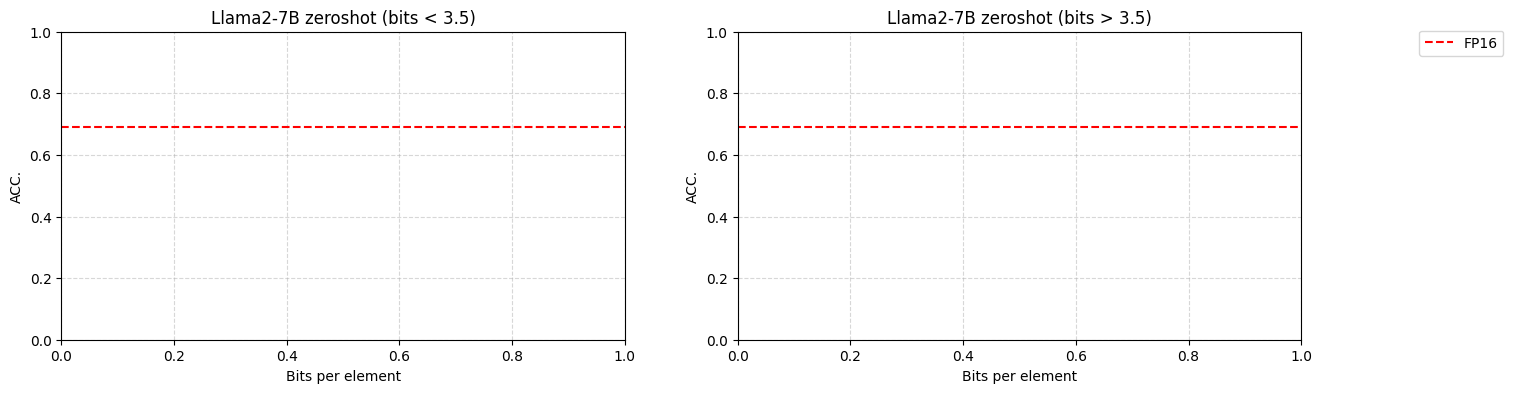

'QUIP#'
'QTIP'
'QTIP`'
'SpinQ'
'NWC_ql_tuned_ldlq_ft'
'NWC_ql_ldlq128_rnorm_ft'


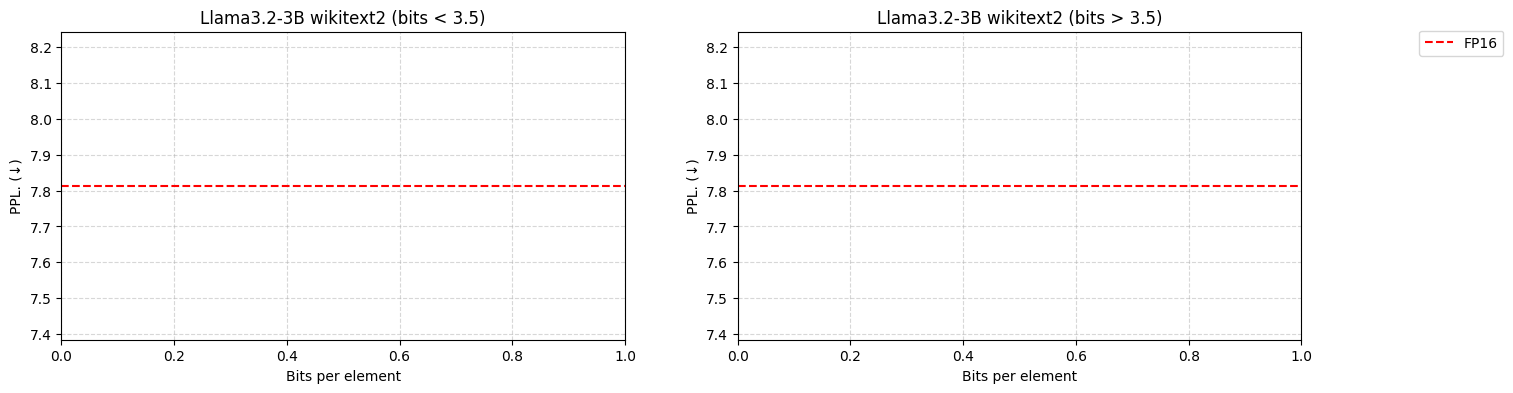

'QUIP#'
'QTIP'
'QTIP`'
'SpinQ'
'NWC_ql_tuned_ldlq_ft'
'NWC_ql_ldlq128_rnorm_ft'


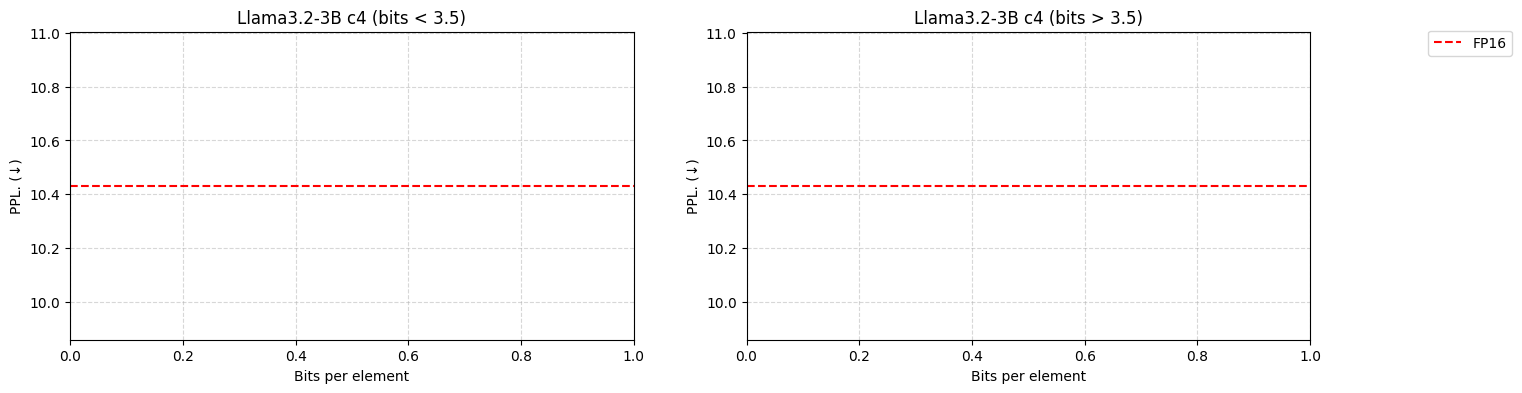

'QUIP#'
'QTIP'
'QTIP`'
'SpinQ'
'NWC_ql_tuned_ldlq_ft'
'NWC_ql_ldlq128_rnorm_ft'


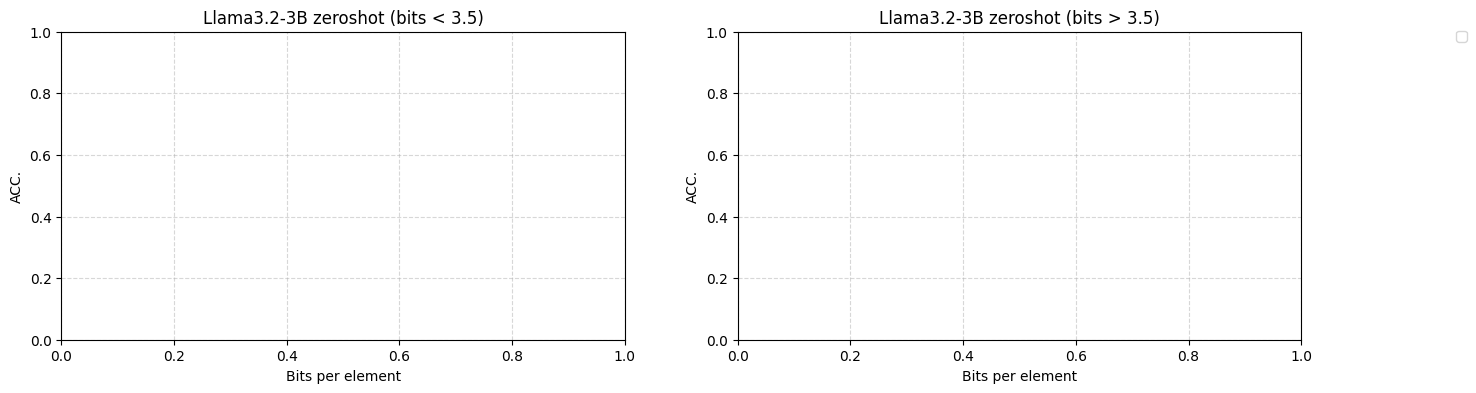

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# None 값을 np.nan으로 대체
def replace_none_with_nan(data):
    return np.array([np.nan if val is None else val for val in data])

# plot_key  = 'ppl_wikitext2'
# plot_key  = 'ppl_c4'
plot_key  = 'zeroshot'
# plot_key  = 'zeroshot'
plot_name = [
        # 'RTNg128',
        # 'SeedLM',
        # 'GPTQ',
        # 'AWQ',
        # 'OMNIQ',
        # 'AQLM',
        'QUIP#',
        # 'QUIP#_no_ft',
        'QTIP',
        'QTIP`',
        # 'QTIP_no_ft',
        'SpinQ',
        # 'Ours_base',
        # 'Ours_ql',
        # 'NWC_ql_channelwise_scale',
        # 'NWC_ql_layerwise_scale',
        # 'Ours_ql_ldlq',
        # 'NWC_RHT_scaled',
        # 'NWC_RHT_scaled_layerft',
        'NWC_ql_tuned_ldlq_ft',
        'NWC_ql_ldlq128_rnorm_ft',
        # 'NWC_ql_ldlq_lnorm',
        # 'NWC_ql_tuned',
        # 'NWC_ql',
        # 'NWC_ql_no_norm',
        # 'NWC_RHT_scaled_ldlq',
        # 'NWC_global_ql',
        # 'NWC_global_ql_v2',
        # 'Ours_ft',
        # 'Ours',
        # 'NWC',
        # 'NWC_lwise_norm',
        # '+code_optim',
        # '+code_optim(dec train)',
        # 'NWC_ql_M32',
        # 'NWC_ql_M32_lwise_norm',
        # 'NWC_ql_M32_lwise_norm(trained)',
        # 'NWC_ql_M32_cwise_norm',
        # 'NWC_ql_M32_cwise_norm(trained)',
        # 'NWC_ql(8b)',
        # 'NWC_ql(8b_7b_droplast)',
        # 'NWC_ql(8b_clip)',
        # 'NWC_ql(7b_droplast)',
        # 'NWC_ql(gaussian)',
        # 'NWC_ql(gaussian_7b_droplast)',
        # 'NWC_ql(gaussian_8b)',
        # 'NWC_ql(8b_7b)',
        # 'NWC_ql(8b_shuffle)',
        # 'NWC_ql(8b_shuffle_7b_shuffle)',
        # 'NWC_ql(8b_shuffle_7b)',
        # 'NWC_ql_col_norm(8b)',
        # 'NWC_ql_row_norm(8b)',
        # 'NWC_ql(8b+7b)',
        # 'NWC_ql(8b+7b_modelnorm)',
        # 'NWC_ql(8b_kde)',
        # 'NWC_ql_code_optim',
        # 'NWC_ql_code_optim(sga)',
        # 'NWC_ql_rnorm_code_optim200',
        # 'NWC_ql_rnorm_code_optim200(init)',
        # 'NWC_ql_rnorm_code_optim200(round)',
        # 'NWC_ql_rnorm_code_optim200(sga)',
    ]
import matplotlib.cm as cm
# cmap = cm.get_cmap('tab20b', len(ppl_plot))  
# cmap = cm.get_cmap('tab10', 5)
cmap = cm.get_cmap('tab10')
# colors = {k: cmap(i) for i, k in enumerate(plot_name)}

plot_labels = [
        'NWC_ql_rnorm',
        'NWC_ql_rnorm_code_optim200',
        # 'NWC_ql_rnorm_code_optim200(init)',
        # 'NWC_ql_rnorm_code_optim200(round)',
        'NWC_ql_rnorm_code_optim200(sga)',
    ]
plot_labels = plot_name if len(plot_labels) != len(plot_name) else plot_labels
colors = np.arange(len(plot_name))
line_styles = ['-']*len(plot_name)

mse_plot = [
    ]

k_order = 1

ylim = {}
ylim['Llama3-8B'] = (None, None)
ylim['Llama2-7B'] = (None, None)
ylim['Llama2-13B'] = (None, None)
# ylim['Llama3-8B'] = (8.85, 9.2)
# ylim['Llama3-8B'] = (6.1, 6.4)
# ylim['Llama2-7B'] = (None, 6.5)
# ylim['Llama2-7B'] = (5.35, 6.5)
# ylim['Llama2-13B'] = (4.8, 6)

xlim = {}
xlim['Llama3-8B'] = (None, None)
xlim['Llama2-7B'] = (None, None)
xlim['Llama2-13B'] = (None, None)
# xlim['Llama3-8B'] = (2.7, None)
# xlim['Llama2-7B'] = (2.5, None)
# xlim['Llama2-13B'] = (2.5, None)

bit_split = 3.5

for m_name, plots in ppl_plots.items():
# for m_name in ['Llama2-7B']:
    # plots = ppl_plots[m_name]
    for plot_key in ['ppl_wikitext2', 'ppl_c4', 'zeroshot']:
        fig, axs = plt.subplots(1, 2, figsize=(16, 4))
        # fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        for k, l, color, line in zip(plot_name, plot_labels, colors, line_styles):
            try:
                v = plots[k]
                if k in  plot_name:  
                    bpp = replace_none_with_nan(v['bpp'])
                    ppl = replace_none_with_nan(v[plot_key])

                    # 곡선 피팅
                    mask = np.isfinite(ppl)
                    mask = ppl < 100
                    x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 500)
                    spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)  # 3차 스플라인
                    y_smooth = spline(x_smooth)

                    if 'NWC' in k or 'Ours' in k:
                        alpha = 1
                        marker='*'
                        ms = 100
                    else:
                        marker='o'
                        alpha = 0.5
                        ms = 30
                        
                    axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle=line, color=cmap(color), label=l, alpha = alpha)
                    axs[0].scatter(bpp[mask][bpp[mask] <= bit_split], ppl[mask][bpp[mask] <= bit_split], color=cmap(color), marker=marker, s = ms, alpha = alpha)

                    axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle=line, color=cmap(color), label=l, alpha = alpha)
                    axs[1].scatter(bpp[mask][bpp[mask] > bit_split], ppl[mask][bpp[mask] > bit_split], color=cmap(color), marker=marker,  s = ms, alpha = alpha)
            except Exception as e:
                print(e)
                pass
        for ax in axs:
            try:
                ax.axhline(y=plots['FP16'][plot_key], color='r', linestyle='--', label='FP16')
            except:
                pass
            ax.set_xlabel('Bits per element')
            # ax.legend()
            ax.grid(True, linestyle='--', alpha = 0.5)

        axs[0].set_title(f'{m_name} {plot_key.split("_")[-1]} (bits < {bit_split})')
        axs[1].set_title(f'{m_name} {plot_key.split("_")[-1]} (bits > {bit_split})')
        
        if 'ppl' in plot_key:
            axs[0].set_ylabel('PPL. (↓)')
            axs[1].set_ylabel('PPL. (↓)')
        else:
            axs[0].set_ylabel('ACC.')
            axs[1].set_ylabel('ACC.')
        
        try:
            axs[0].set_ylim(ylim[m_name])
            # axs[1].set_ylim(ylim[m_name])
            axs[0].set_xlim(xlim[m_name])        
        except:
            pass
        # fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
        
        handles, labels = axs[0].get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))  # 중복 제거

        # 범례를 fig 밖으로 배치 (중복 제거된 항목만)
        fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(1, 0.9), ncol=1)
        # plt.suptitle(m_name)
        # plt.legend()
        plt.show()

### llama3 8b

In [21]:
## llama3-8
import numpy as np
ppl_plots = {}

plots = {}

plots['AWQ'] = {}
plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25]
plots['AWQ']['ppl_wikitext2'] = [1706217.75, 8.243, 6.531, 6.237, 6.157, 6.141, 6.138, 6.135891437530518]
plots['AWQ']['ppl_c4'] = [None, None, 9.396510124206543, 8.995973587036133, 8.906269073486328, 8.887651443481445, 8.881821632385254, 8.881292343139648]
plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]
plots['AWQ']['zeroshot'] = [None, None, 0.7234130858684871, 0.7298931522879416, 0.7268199977535291, 0.7275232348388868, 0.7282946139046595, 0.7278560248829934]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [None]
plots['OMNIQ']['ppl_wikitext2'] = [None]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl_wikitext2'] = [11.754, 6.801, 6.080]
plots['QUIP#_no_ft']['ppl_c4'] = [16.809, 10.370, 8.874]

plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl_wikitext2'] = [9.312, 6.990, 6.424]
plots['QUIP#']['ppl_c4'] = [12.773, 10.023, 9.335]
plots['QUIP#']['zeroshot'] = [0.6597419769612316, 0.7125861995086145, 0.7213374078294685]

# plots['QTIP`'] = {}
# plots['QTIP`']['bpp'] = [2, 3, 4]
# plots['QTIP`']['ppl_wikitext2'] = [8.106,6.664,6.297]
# plots['QTIP`']['ppl_c4'] = [11.815123558044434, 9.572436332702637 ,9.071606636047363]
# plots['QTIP`']['zeroshot'] = [None, 0.7226339079941553 , 0.7290387661499047]

plots['QTIP`'] = {}
plots['QTIP`']['bpp'] = [2, 3, 4, 5, 6, 7]
plots['QTIP`']['zeroshot'] = [0.6906918015831197, 0.7226339079941553, 0.7290387661499047, 0.7300888652689438, 0.7317489661236138, 0.7309889642407812]
plots['QTIP`']['ppl_wikitext2'] = [8.106,6.664,6.297, 6.219356060028076, 6.222760200500488, 6.222774982452393]
plots['QTIP`']['ppl_c4'] = [11.815123558044434, 9.572436332702637, 9.071606636047363, 8.98123836517334, 8.982561111450195, 8.982028007507324]



plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2]
plots['QTIP']['ppl_wikitext2'] = [8.10886001586914]
plots['QTIP']['ppl_c4'] = [11.34353256225586]
plots['QTIP']['zeroshot'] = [0.6906918015831197]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2,3,4,5,6,7]
plots['QTIP_no_ft']['ppl_wikitext2'] = [9.744,6.840,6.339, 6.253672122955322, 6.2546563148498535, 6.254655838012695]
plots['QTIP_no_ft']['ppl_c4'] = [None,None,None, 9.010744094848633, 9.011184692382812, 9.011035919189453]
plots['QTIP_no_ft']['zeroshot'] = [None, None, None, 0.7317278153771081, 0.7325035101081055, None]


# plots['AQLM'] = {}
# plots['AQLM']['bpp'] = [2,3,4]
# plots['AQLM']['ppl_wikitext2'] = [9.744,6.840,6.339]

plots['AQLM'] = {}
plots['AQLM']['bpp'] = [2]
plots['AQLM']['ppl_wikitext2'] = [7.761857986450195]
plots['AQLM']['ppl_c4'] = [10.8907051086425789]

plots['NWC_ql_tuned_ldlq_ft'] = {}
plots['NWC_ql_tuned_ldlq_ft']['bpp'] = [2.3503167743289954, 2.7167603686044073, 3.213820520092283, 3.9955983058457254, 4.806541982468179, 5.974153137660603]
plots['NWC_ql_tuned_ldlq_ft']['ppl_wikitext2'] = [8.618568420410156, 7.426833152770996, 6.740654945373535, 6.3390212059021, 6.201639652252197, None]
plots['NWC_ql_tuned_ldlq_ft']['ppl_c4'] = [12.045183181762695, 10.615286827087402, 9.707376480102539, 9.121989250183105, 8.955321311950684, 8.901552200317383]
plots['NWC_ql_tuned_ldlq_ft']['zeroshot'] = [0.6775462119134815, 0.700615982668705, 0.7222027238600783, 0.7278117246555829, 0.726265208255292, 0.728454528668937]

plots['NWC_ql_ldlq_lnorm'] = {}
plots['NWC_ql_ldlq_lnorm']['bpp'] = [3.9651611150461927, 4.864048294447737, 7.1424700350936785]
plots['NWC_ql_ldlq_lnorm']['zeroshot'] = [0.727139323470181, 0.729055448026720, 0.7284623222950006]
plots['NWC_ql_ldlq_lnorm']['ppl_wikitext2'] = [6.352479934692383, 6.1997599601745605, 6.148508071899414]
plots['NWC_ql_ldlq_lnorm']['ppl_c4'] = [9.145858764648438, 8.960957527160645, 8.894388198852539]

plots['SpinQ'] = {}
plots['SpinQ']['bpp'] = [5, 6, 7, 8, 9]
plots['SpinQ']['zeroshot'] = [0.7306027344648212, 0.7315773049339473, 0.7287862681657514, 0.7290385141834816, 0.7296742732998392]
plots['SpinQ']['ppl_wikitext2'] = [6.253126621246338, 6.177572250366211, 6.154661178588867, 6.148306846618652, 6.147614479064941]
plots['SpinQ']['ppl_c4'] = [9.079610824584961, 8.951584815979004, 8.915331840515137, 8.902764320373535, 8.901545524597168]

plots['RTNg128'] = {}
plots['RTNg128']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['RTNg128']['ppl_wikitext2'] = [295954.625, 12.141, 6.731, 6.304, 6.186, 6.150, 6.140]
plots['RTNg128']['ppl_c4'] = [None, None, 9.997003555297852, 9.14610767364502, 8.958009719848633, 8.896822929382324, 8.884255409240723]
plots['RTNg128']['mse'] = [0.2619, 0.0489, 0.0107, 0.0025, 0.0006, 0.0002, 4.6240e-05]
plots['RTNg128']['zeroshot'] = [None, None, 0.7164253093662043, 0.7227695616150781, 0.7307781867642691, 0.7292357096531956, 0.7286665640440705]

plots['RTN'] = {}
plots['RTN']['bpp'] = [2, 3, 4, 5, 6, 7, 8]
plots['RTN']['ppl_wikitext2'] = [1385877.125, 2276.227, 8.537, 6.561, 6.270, 6.173, 6.149]
plots['RTN']['mse'] = [0.5205, 0.1124, 0.0253, None, 0.0015, None, 9.9967e-05]


plots['VQVAE_old'] = {}
plots['VQVAE_old']['bpp'] = [2,3,4,5,6,8] 
plots['VQVAE_old']['ppl_wikitext2'] = [801779, 110.0668, 10.7364, 7.8319, 7.6031, 7.5663]
plots['VQVAE_old']['mse'] = [0.1144, 0.0389, 0.0186, 0.0049, 0.0028, 0.0020]

plots['VQVAE'] = {}
plots['VQVAE']['bpp'] = [3, 4, 5, 6, 8]
plots['VQVAE']['ppl_wikitext2'] = [24.881,7.194, 6.470, 6.215, 6.177]
plots['VQVAE']['mse'] = [0.03701, 0.01228, 0.00365, 0.00101, 9e-5]

plots['VQVAE_idx'] = {}
plots['VQVAE_idx']['bpp'] = [3, 4, 6, 8] 
plots['VQVAE_idx']['ppl_wikitext2'] = [50.871, 7.739, None, 6.223]
plots['VQVAE_idx']['mse'] = [0.0369, 0.0192, 0.0027, 0.0010]

plots['VQVAE_idx_row'] = {}
plots['VQVAE_idx_row']['bpp'] = [3, 4, 5, 6, 7, 8] 
plots['VQVAE_idx_row']['ppl_wikitext2'] = [159.215, 7.852, None, 6.545, None, 6.166]
plots['VQVAE_idx_row']['mse'] = [0.0410, 0.0123, 0.0064, 0.0033, 0.0026, 0.0002]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl_wikitext2'] = [10.1, 7.0]
plots['SeedLM']['mse'] = [0.0388, 0.0081]

plots['NWC_row16'] = {}
plots['NWC_row16']['bpp'] = [6.398, 8.22, 10.074, 10.108]
plots['NWC_row16']['ppl_wikitext2'] = [6.828, 6.212, 6.162, 6.158]
plots['NWC_row16']['mse'] = [0.00725, 0.00076, 0.00017, 0.00016]

plots['NWC_col128'] = {}
plots['NWC_col128']['bpp'] = [3.27539, 3.77784, 4.57791, 5.44646, 7.08356, 7.8364]
plots['NWC_col128']['ppl_wikitext2'] = [9.072, 7.492, 6.392, 6.222, 6.142, 6.140]
plots['NWC_col128']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_row128'] = {}
plots['NWC_row128']['bpp'] = [3.64225, 4.14475, 4.9485, 5.828, 7.466, 8.2165]
plots['NWC_row128']['ppl_wikitext2'] = [8.000, 6.922, 6.375, 6.225, 6.146, 6.142]
plots['NWC_row128']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [2.898, 3.311, 3.81, 4.27, 5.47, 6.474, 6.644]
plots['NWC_row16_bundle']['ppl_wikitext2'] = [11.542, 7.724, 6.876, 6.501, 6.228, 6.167, 6.160]
plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']

plots['NWC_lwise_norm'] = {}
plots['NWC_lwise_norm']['bpp'] = [3.304869430569502, 3.802277807576152, 4.303977950117909, 5.454150784187592, 6.459607735849344]
plots['NWC_lwise_norm']['ppl_wikitext2'] = [7.271052360534668, 6.6622724533081055, 6.370100975036621, 6.18549108505249, 6.235317707061768]
plots['NWC_lwise_norm']['ppl_c4'] = [10.467362403869629, 9.575017929077148, 9.182055473327637, 8.944039344787598, 9.006536483764648]

plots['+code_optim'] = {}
plots['+code_optim']['bpp'] = [3.3020998073311953]
plots['+code_optim']['ppl_wikitext2'] = [6.997391700744629]
plots['+code_optim']['ppl_c4'] = [10.030966758728027]

plots['+code_optim(dec train)'] = {}
plots['+code_optim(dec train)']['bpp'] = [3.3020797967910767]
plots['+code_optim(dec train)']['ppl_wikitext2'] = [7.009182929992676]
plots['+code_optim(dec train)']['ppl_c4'] = [10.042492866516113]

plots['NWC_col_tr'] = {}
plots['NWC_col_tr']['bpp'] = [3.249,3.752,4.529,5.325,6.613,7.142]
plots['NWC_col_tr']['ppl_wikitext2'] = [8.558,7.841,6.903,6.535,6.283,6.288]
plots['NWC_tr'] = plots['NWC_col_tr']

plots['NWC_col_tr_hpy'] = {}
plots['NWC_col_tr_hpy']['bpp'] = [3.266,3.753,4.511,5.311,6.443,6.715]
plots['NWC_col_tr_hpy']['ppl_wikitext2'] = [10.579,7.981,6.941,6.655,6.435,6.383]
plots['NWC_tr_hpy'] = plots['NWC_col_tr_hpy']

plots['NWC_row16_bundle_rht_trained'] = {}
plots['NWC_row16_bundle_rht_trained']['bpp'] = [3.290,3.791,4.296,4.589]
plots['NWC_row16_bundle_rht_trained']['ppl_wikitext2'] = [7.703,6.838,6.493,6.378]
plots['Ours_RHT_no_ql_trained'] = plots['NWC_row16_bundle_rht_trained']

plots['NWC_row16_bundle_ROWCOL'] = {}
plots['NWC_row16_bundle_ROWCOL']['bpp'] = [3.311, 3.81, 4.27, 5.47, 6.474, 6.644]
plots['NWC_row16_bundle_ROWCOL']['ppl_wikitext2'] = [7.724, 6.876, 6.501, 6.228, 6.167, 6.160]
plots['NWC_row16_bundle_ROWCOL']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]

plots['NWC_ql_random_seq16(loss)'] = {}
plots['NWC_ql_random_seq16(loss)']['bpp'] = [2.56, 3.058, 3.56, 3.86, 4.70, 5.93]
plots['NWC_ql_random_seq16(loss)']['ppl_wikitext2'] = [11.939, 7.735, 6.891, 6.640, 6.294, 6.187]
plots['NWC_ql_random_seq16(loss)']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.573, 3.0733, 3.579, 3.873, 4.7203, 5.9474]
plots['NWC_ql_random_seq16']['ppl_wikitext2'] = [11.939, 7.735, 6.891, 6.640, 6.294, 6.187]
plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

# plots['NWC_ql_random_seq16_2'] = {}
# plots['NWC_ql_random_seq16_2']['bpp'] = [2.242, 2.613881, 3.11315, 3.618142049, 3.9107435, 4.75101, 5.952254, 6.1921]
# plots['NWC_ql_random_seq16_2']['ppl_wikitext2'] = [15.875, 9.312, 7.258, 6.721, 6.509, 6.259, 6.183, 6.184]
# plots['NWC_ql_random_seq16_2']['mse'] = [0.03902, 0.0195, 0.009806, 0.00661, 0.00206, 0.000506, 0.000446]
# plots['Ours_ql'] = plots['NWC_ql_random_seq16_2']

## col 1024 quip hess
plots['NWC_ql_random_seq16_2'] = {}
plots['NWC_ql_random_seq16_2']['bpp'] = [2.241779004331105, 2.614222769912046, 3.116372105235664, 3.909219218346362, 4.739989903110724, 5.949137418745802]
plots['NWC_ql_random_seq16_2']['ppl_wikitext2'] = [15.8749418258667, 9.087989807128906, 7.278524398803711, 6.499088287353516, 6.2653279304504395, 6.1972503662109375]
plots['Ours_ql'] = plots['NWC_ql_random_seq16_2']

plots['NWC_ql_cwise_norm'] = {}
plots['NWC_ql_cwise_norm']['bpp'] = np.array([2.286322521833846, 2.658620822744874, 3.1595407714350867, 3.9504008159901085, 4.7767885486380415]) + 0.005
plots['NWC_ql_cwise_norm']['ppl_wikitext2'] = [10.23042106628418, 7.925183296203613, 6.9207305908203125, 6.397050857543945, 6.233718395233154]

plots['NWC_ql_lwise_norm'] = {}
plots['NWC_ql_lwise_norm']['bpp'] = [2.27796330761451, 2.650187787743142, 3.151212928745036, 3.9424328162119937, 4.769576168690737]
plots['NWC_ql_lwise_norm']['ppl_wikitext2'] = [10.545912742614746, 8.034196853637695, 6.96010684967041, 6.407600402832031, 6.236728668212891]

plots['NWC_ql_M32'] = {}
plots['NWC_ql_M32']['bpp'] = [4.835923480013242, 7.109856320545077]
plots['NWC_ql_M32']['ppl_wikitext2'] = [6.273656845092773, 6.170483112335205]
plots['NWC_ql_M32']['ppl_c4'] = [9.035621643066406, 8.91879940032959]

plots['NWC_ql_M32_cwise_norm'] = {}
plots['NWC_ql_M32_cwise_norm']['bpp'] = [4.871701626823499]
plots['NWC_ql_M32_cwise_norm']['ppl_wikitext2'] = [6.2406792640686035]
plots['NWC_ql_M32_cwise_norm']['ppl_c4'] = [8.997408866882324]

plots['NWC_ql_M32_cwise_norm(trained)'] = {}
plots['NWC_ql_M32_cwise_norm(trained)']['bpp'] = [4.903632852893609]
plots['NWC_ql_M32_cwise_norm(trained)']['ppl_wikitext2'] = [6.381570816040039]
plots['NWC_ql_M32_cwise_norm(trained)']['ppl_c4'] = [9.161148071289062]

plots['NWC_ql_M32_lwise_norm'] = {}
plots['NWC_ql_M32_lwise_norm']['bpp'] = [4.8637161658933525]
plots['NWC_ql_M32_lwise_norm']['ppl_wikitext2'] = [6.247074604034424]
plots['NWC_ql_M32_lwise_norm']['ppl_c4'] = [9.005769729614258]

plots['NWC_ql_M32_lwise_norm(trained)'] = {}
plots['NWC_ql_M32_lwise_norm(trained)']['bpp'] = [4.899643537230217]
plots['NWC_ql_M32_lwise_norm(trained)']['ppl_wikitext2'] = [6.363482475280762]
plots['NWC_ql_M32_lwise_norm(trained)']['ppl_c4'] = [9.129022598266602]


plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.6198,3.1161,3.6198,3.9119,4.7514,5.9525,6.1922]
plots['NWC_ql_random_seq16_ldlq']['ppl_wikitext2'] = [8.595,7.094,6.607,6.456,6.23,6.161,6.161]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.6134, 3.1127, 3.6177, 3.9103, 4.7507,5.9521,6.1921]
plots['NWC_ql_random_seq16_n6144']['ppl_wikitext2'] = [9.185,7.277,6.714,6.521,6.265,6.184,6.185]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

plots['NWC_ql_Q4'] = plots['NWC_ql_random_seq16_2']

plots['NWC_ql_Q4_uniform'] = {}
plots['NWC_ql_Q4_uniform']['bpp'] = [4.377752911, 4.86104, 5.4637, 5.87986, 6.23135021]
plots['NWC_ql_Q4_uniform']['ppl_wikitext2'] = [6.951, 6.544, 6.306, 6.218, 6.175]

plots['NWC_ql_Q8'] = {}
plots['NWC_ql_Q8']['bpp'] = [2.60743, 3.1143509, 3.903865, 4.7208657]
plots['NWC_ql_Q8']['ppl_wikitext2'] = [9.349, 7.344, 6.52, 6.289]

plots['NWC_ql_Q8_uniform'] = {}
plots['NWC_ql_Q8_uniform']['bpp'] = [5.0481215,5.4334279, 5.9105,6.115277]
plots['NWC_ql_Q8_uniform']['ppl_wikitext2'] = [6.661, 6.436, 6.287, 6.22]

plots['NWC_ql_Q16'] = {}
plots['NWC_ql_Q16']['bpp'] = [3.02635, 3.51864341, 4.27595, 5.054298]
plots['NWC_ql_Q16']['ppl_wikitext2'] = [7.758, 6.933, 6.431, 6.29]

plots['NWC_hesseigen'] = {}
plots['NWC_hesseigen']['bpp'] = [4.8644537, 5.2838, 5.7891, 6.10161]
plots['NWC_hesseigen']['ppl_wikitext2'] = [6.315, 6.244, 6.193, 6.178]
plots['NWC_hesseigen']['mse'] = [0.001812, 0.00112, 0.00064, 0.0005009]

plots['NWC_gaussian_seq16'] = {}
plots['NWC_gaussian_seq16']['bpp'] = [3.36442, 3.8647, 4.36402, 5.50448, 6.66792, 6.73752]
plots['NWC_gaussian_seq16']['ppl_wikitext2'] = [7.993, 6.885, 6.561, 6.406, 7.829, 6.752]
plots['NWC_gaussian_seq16']['mse'] = [0.01445, 0.00724, 0.00365, 0.00091, 0.00196, 0.00097]

plots['nwc_hp_row_seq16'] = {}
plots['nwc_hp_row_seq16']['bpp'] = [3.34822, 3.852, 4.37264, 5.51448,	6.5558]
plots['nwc_hp_row_seq16']['ppl_wikitext2'] = [7.735, 6.845, 6.5, 6.215, 6.168]
plots['nwc_hp_row_seq16']['mse'] = [0.01447, 0.00725, 0.00363, 0.00077, 0.00023]


# ## NWC_col128
plots['Entropy(loss)'] = {}
plots['Entropy(loss)']['bpp'] = [3.27539, 3.77784, 4.57791, 5.44646, 7.08356, 7.8364]
plots['Entropy(loss)']['ppl_wikitext2'] = [8.000, 6.922, 6.375, 6.225, 6.146, 6.142]
plots['Entropy(loss)']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_ql_col16'] = {}
plots['NWC_ql_col16']['bpp'] = [2.90884, 4.55409, 5.89107, 6.10535]
plots['NWC_ql_col16']['ppl_wikitext2'] = [7.921, 6.342, 6.262, 6.265]
plots['NWC_ql_col16']['mse'] = [0.02425, 0.00252, 0.00051, 0.00043]

plots['NWC_ql_random_col128'] = {}
plots['NWC_ql_random_col128']['bpp'] = [3.06427, 3.58498, 4.73994, 6.38184, 7.12939]
plots['NWC_ql_random_col128']['ppl_wikitext2'] = [9.733, 6.790, 6.268, 6.154, 6.146]
plots['NWC_ql_random_col128']['mse'] = [0.02039, 0.01025, 0.00205, 0.00022, 8e-05]

plots['NWC_row16'] = {}
plots['NWC_row16']['bpp'] = [6.014, 6.39, 8.22]
plots['NWC_row16']['ppl_wikitext2'] = [7.796, 6.844, 6.217]
plots['NWC_row16']['mse'] = [0.0145, 0.00725, 0.00076]

plots['NWC_col16'] = {}
plots['NWC_col16']['bpp'] = [6.13, 6.424]
plots['NWC_col16']['ppl_wikitext2'] = [7.830, 6.849]
plots['NWC_col16']['mse'] = [0.0145, 0.00725]

plots['NWC_gaussian16'] = {}
plots['NWC_gaussian16']['bpp'] = [6.12, 6.38, 8.054]
plots['NWC_gaussian16']['ppl_wikitext2'] = [8.084, 6.935, 6.230]
plots['NWC_gaussian16']['mse'] = [0.0146, 0.00723, 0.00077]

plots['NWC_col16_seq_rescale3'] ={}
plots['NWC_col16_seq_rescale3']['bpp'] = [2.112694778,3.274334534,3.77466374,5.422167316]
plots['NWC_col16_seq_rescale3']['ppl_wikitext2'] = [13.22559929,6.886213779,6.501080513,6.177906513]

plots['NWC_col16_seq_rescale3_ldlq'] ={}
plots['NWC_col16_seq_rescale3_ldlq']['bpp'] = [2.12166928,3.276129064,3.775550555,5.42227727]
plots['NWC_col16_seq_rescale3_ldlq']['ppl_wikitext2'] = [12.93155766,6.764129162,6.444180012,6.169330597]

plots['NWC_RHT_scaled'] = {}
plots['NWC_RHT_scaled']['bpp'] = [2.113,2.906,3.274,3.775,4.275,4.576,5.422]
plots['NWC_RHT_scaled']['ppl_wikitext2'] = [13.226,7.450,6.886,6.501,6.320,6.262,6.178]

plots['NWC_RHT_scaled_layerft'] = {}
plots['NWC_RHT_scaled_layerft']['bpp'] = [2.0897195665882182, 2.878303707505648, 3.2459880529114833, 3.748942504422023, 4.251879811286926, 4.548974734372818, 5.402224775403738]
plots['NWC_RHT_scaled_layerft']['ppl_wikitext2'] = [13.459770202636719, 7.43629264831543, 6.852028846740723, 6.492372989654541, 6.3184614181518555, 6.249212741851807, 6.172792434692383]

plots['NWC_RHT_scaled_ldlq'] = {}
plots['NWC_RHT_scaled_ldlq']['bpp'] = [2.122,2.909,3.276,3.776,4.275,4.576,5.422]
plots['NWC_RHT_scaled_ldlq']['ppl_wikitext2'] = [12.932,7.231,6.764,6.444,6.290,6.240,6.169]

plots['NWC_ql_tuned'] = {}
plots['NWC_ql_tuned']['bpp'] = [2.329528439288529, 2.6998064911995945]
plots['NWC_ql_tuned']['ppl_wikitext2'] = [10.675835609436035, 8.157130241394043]

plots['NWC_ql_no_norm'] = {}
plots['NWC_ql_no_norm']['bpp'] =  [2.6157369055570316, 3.115294962763213, 4.737285897565576, 5.909969212917181]
plots['NWC_ql_no_norm']['ppl_wikitext2'] =  [8.908318519592285, 7.4690704345703125, 6.270925045013428, 6.22852897644043]
plots['NWC_ql_no_norm']['ppl_c4'] =  [10.647041320800781, 8.979228019714355, 9.040287017822266, 12.573484420776367]

plots['NWC_ql_ldlq128_rnorm_ft'] = {}
plots['NWC_ql_ldlq128_rnorm_ft']['bpp'] =  [2.3015328621482833, 2.6693616848877775, 3.16721133423002, 3.954826640797994, 4.77782450354873, 5.9810235201596065]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_wikitext2'] =  [8.403983116149902, 7.251631259918213, 6.6762261390686035, 6.31689453125, 6.193994998931885, 6.15234375]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_c4'] =  [11.731051445007324, 10.42491340637207, 9.59599781036377, 9.087160110473633, 8.944413185119629, 8.895471572875977]
plots['NWC_ql_ldlq128_rnorm_ft']['zeroshot'] =  [0.6837428048045503, 0.711155642760884, 0.7220614639150719, 0.7316054281153441, 0.7312745842563112, 0.7300477303109602]


# [2.3503167743289954, 2.7167603686044073, 3.213820520092283, 3.9955983058457254, 4.806541982468179]
# [8.618568420410156, 7.426833152770996, 6.740654945373535, 6.3390212059021, 6.201639652252197]

# FP16 = 6.13
plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 6.135671615600586
plots['FP16']['ppl_c4'] = 8.88062572479248
# plots['FP16']['zeroshot'] = 0.7614012372

plots['FP16']['zeroshot'] =0.7290239504254532
ppl_plots['Llama3-8B'] = plots

### llama2 7B

In [22]:
## Llama2-7B
plots = {}

plots['AWQ'] = {}
plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['AWQ']['ppl_wikitext2'] = [227242.422, 6.208, 5.608, 5.505, 5.481, 5.469, 5.47]
# plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [2, 3, 4]
plots['OMNIQ']['ppl_wikitext2'] = [37.4, 6.58, 5.74]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl_wikitext2'] = [12.3, 6.19, 5.66]

plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl_wikitext2'] = [6.66, 5.79, 5.56]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2, 3, 4]
plots['QTIP_no_ft']['ppl_wikitext2'] = [6.85181999206543, 5.77194, 5.5444]

plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl_wikitext2'] = [6.285030841827393, 5.6509785652160645, 5.530890464782715]

plots['GPTQ'] = {}
plots['GPTQ']['bpp'] = [2, 3, 4]
plots['GPTQ']['ppl_wikitext2'] = [165.151,6.673,5.788]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl_wikitext2'] = [6.6, 5.7]
# plots['SeedLM']['mse'] = [0.0388, 0.0081]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [2.923, 3.292, 3.7914, 4.2906, 5.4399, 6.445, 6.6136]
plots['NWC_row16_bundle']['ppl_wikitext2'] = [7.265, 6.132, 5.72, 5.605, 5.495, 5.476, 5.485]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']


plots['NWC_row16_bundle_rht'] = {}
plots['NWC_row16_bundle_rht']['bpp'] = [3.31003, 3.80728, 4.30509, 5.45322, 6.45817405]
plots['NWC_row16_bundle_rht']['ppl_wikitext2'] = [6.0841, 5.7096, 5.605, 5.4826, 5.4730243]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['Ours_RHT_no_ql'] = plots['NWC_row16_bundle_rht']

plots['NWC_row16_bundle_rht_trained'] = {}
plots['NWC_row16_bundle_rht_trained']['bpp'] = [3.307,3.807,4.310,4.602]
plots['NWC_row16_bundle_rht_trained']['ppl_wikitext2'] = [6.098,5.717,5.583,5.541]
plots['Ours_RHT_no_ql_trained'] = plots['NWC_row16_bundle_rht_trained']

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.269, 2.6401, 3.138932, 3.64297201, 3.9338092, 4.770383, 5.96783319, 6.206536][:-1]
plots['NWC_ql_random_seq16']['ppl_wikitext2'] = [7.891, 6.354, 5.83, 5.636, 5.587, 5.501, 5.487, 5.497][:-1]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_ql'] = plots['NWC_ql_random_seq16']

plots['NWC_ql_random_seq16_rht'] = {}
plots['NWC_ql_random_seq16_rht']['bpp'] = [3.320,3.857,4.396,4.696]
plots['NWC_ql_random_seq16_rht']['ppl_wikitext2'] = [6.414,5.793,5.606,5.559]
plots['Ours_RHT'] = plots['NWC_ql_random_seq16_rht']

plots['NWC_ql_random_seq16_ft'] = {}
plots['NWC_ql_random_seq16_ft']['bpp'] = [2.640922043993683, 3.1394193181719805, 3.643218957389575, 3.9339819589118266]
plots['NWC_ql_random_seq16_ft']['ppl_wikitext2'] = [6.095, 5.737, 5.607, 5.560]
plots['Ours_ft'] = plots['NWC_ql_random_seq16_ft']

plots['NWC_ql_random_seq16_gptq'] = {}
plots['NWC_ql_random_seq16_gptq']['bpp'] = [2.648347,3.143081,3.64518,3.935356,4.77088256,5.967929,6.20653]
plots['NWC_ql_random_seq16_gptq']['ppl_wikitext2'] = [6.263,5.77,5.628,5.583,5.516,5.484,5.488]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_gptq'] = plots['NWC_ql_random_seq16_gptq']

plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.648,3.1429,3.6451, 3.9353,4.7709,5.9679,6.2066][:-1]
plots['NWC_ql_random_seq16_ldlq']['ppl_wikitext2'] = [6.177,5.755,5.592,5.562,5.497,5.478,5.483][:-1]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

## ours_ql_ft_ldlq
plots['Ours'] = {}
plots['Ours']['bpp'] = [2.28240699,2.648025293,3.143159624,3.64486945,4.771,5.968]
plots['Ours']['ppl_wikitext2'] = [6.580651283,5.996817589,5.7018013,5.577580929,5.492,5.475]

plots['NWC_ql_ldlq256_rnorm'] = {}
plots['NWC_ql_ldlq256_rnorm']['bpp'] =  [2.675849822402927, 3.1728377631754454, 4.7796154525613535, 5.982058836388465]
plots['NWC_ql_ldlq256_rnorm']['ppl_wikitext2'] =  [6.015779972076416, 5.69957971572876, 5.492321491241455, 5.478099346160889]
plots['NWC_ql_ldlq256_rnorm']['ppl_c4'] =  [7.594015121459961, 7.226944446563721, 6.9958367347717285, 6.977689743041992]
plots['NWC_ql_ldlq256_rnorm']['zeroshot'] =  [0.6701035050644559, 0.6797389219720855, 0.6870070779982965, 0.6870353597418104]


plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.639781555,3.1386,3.6427,3.9335,4.7701,5.9677,6.02065]
plots['NWC_ql_random_seq16_n6144']['ppl_wikitext2'] = [6.346, 5.837,5.627,5.58,5.506,5.485,5.495]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

plots['NWC_ql_random_seq16(2-7b)'] = {}
plots['NWC_ql_random_seq16(2-7b)']['bpp'] = [2.64962, 3.15262, 3.940098, 4.762928095, 5.93973]
plots['NWC_ql_random_seq16(2-7b)']['ppl_wikitext2'] = [6.384, 5.813, 5.573, 5.513, 5.497]
plots['Ours_in_domain'] = plots['NWC_ql_random_seq16(2-7b)']

plots['NWC_RHT_scaled'] = {}
plots['NWC_RHT_scaled']['bpp'] = [2.136,3.297,3.798,4.589]
plots['NWC_RHT_scaled']['ppl_wikitext2'] = [7.635,5.698,5.575,5.503]

# plots['NWC_RHT_scaled_ldlq'] = {}
# plots['NWC_RHT_scaled_ldlq']['bpp'] = [2.122,2.909,3.276,3.776,4.275,5.422]
# plots['NWC_RHT_scaled_ldlq']['ppl_wikitext2'] = [12.932,7.231,6.764,6.444,6.290,6.169]


plots['NWC_global_ql'] ={}
plots['NWC_global_ql']['bpp'] = [2.619,3.118,3.913,4.752]
plots['NWC_global_ql']['ppl_wikitext2'] = [6.349,5.793,5.566,5.501]


plots['NWC_global_ql_v2'] ={}
plots['NWC_global_ql_v2']['bpp'] = [2.6516477477982874,3.150353873023097, 3.9453540001199654]
plots['NWC_global_ql_v2']['ppl_wikitext2'] = [6.241876125335693,5.752368927001953, 5.557637691497803]

plots['NWC_ql(8b)'] ={}
plots['NWC_ql(8b)']['bpp'] =  [2.640846445461629, 3.14243735905756, 3.932728222614743, 4.75935531573592, 5.96518794088166, 6.330963550145144]
plots['NWC_ql(8b)']['ppl_wikitext2'] =  [6.351863861083984, 5.821885585784912, 5.583021640777588, 5.500166416168213, 5.4820332527160645,  5.490025997161865]
plots['NWC_ql(8b)']['ppl_c4'] =  [7.997801303863525, 7.356410503387451, 7.092357158660889, 7.014760971069336, 6.986706733703613, 6.986390113830566]
plots['NWC_ql(8b)']['zeroshot'] =  [0.6547407258585414, 0.672048898997363, 0.687857179042352, 0.6856292685351637, 0.6871639096209481, 0.6881257018600777]

plots['NWC_ql_col_norm(8b)']={}
plots['NWC_ql_col_norm(8b)']['bpp'] =  [2.6608923011184356, 3.162103906196634, 4.775404021529954, 5.977765099372271]
plots['NWC_ql_col_norm(8b)']['ppl_wikitext2'] =  [6.249139785766602, 5.795207500457764, 5.505555629730225, 5.489438533782959]
plots['NWC_ql_col_norm(8b)']['ppl_c4'] =  [7.826968193054199, 7.311830043792725, 7.0102434158325195, 6.988060474395752]

plots['NWC_ql_row_norm(8b)']={}
plots['NWC_ql_row_norm(8b)']['bpp'] =  [2.664573393260259, 3.165425895718095, 4.775710674919613, 5.978521683364335]
plots['NWC_ql_row_norm(8b)']['ppl_wikitext2'] =  [6.164825916290283, 5.764138221740723, 5.497742652893066, 5.479611873626709]
plots['NWC_ql_row_norm(8b)']['ppl_c4'] =  [7.7482757568359375, 7.291442394256592, 7.005768775939941, 6.984014511108398]

plots['NWC_ql(8b_7b)'] ={}
plots['NWC_ql(8b_7b)']['bpp'] =  [2.6480389157879536, 3.1490431341482568, 4.770197021683263, 5.977157489314598]
plots['NWC_ql(8b_7b)']['ppl_wikitext2'] =  [6.321537971496582, 5.816976070404053, 5.5150909423828125, 5.4884934425354]
plots['NWC_ql(8b_7b)']['ppl_c4'] =  [7.96422004699707, 7.351283073425293, 7.014838695526123, 6.99774169921875]

plots['NWC_ql(8b_shuffle)'] ={}
plots['NWC_ql(8b_shuffle)']['bpp'] =  [2.6397104868617083, 3.142023905108012, 4.757373093168971, 5.97548216365162]
plots['NWC_ql(8b_shuffle)']['ppl_wikitext2'] =  [6.347573757171631, 5.823548316955566, 5.515288352966309, 5.487436771392822]
plots['NWC_ql(8b_shuffle)']['ppl_c4'] =  [8.008585929870605, 7.361362457275391, 7.021761894226074, 6.988626956939697]

plots['NWC_ql(8b_shuffle_7b_shuffle)'] ={}
plots['NWC_ql(8b_shuffle_7b_shuffle)']['bpp'] =  [2.259289623387737, 2.7570076288336915, 4.394046233880087, 5.755949962942093]
plots['NWC_ql(8b_shuffle_7b_shuffle)']['ppl_wikitext2'] =  [8.917670249938965, 6.427505016326904, 5.544740200042725, 5.4877142906188965]
plots['NWC_ql(8b_shuffle_7b_shuffle)']['ppl_c4'] =  [10.837404251098633, 8.047004699707031, 7.053302764892578, 6.993697166442871]

plots['NWC_ql(8b_shuffle_7b)'] ={}
plots['NWC_ql(8b_shuffle_7b)']['bpp'] =  [2.259164006753289, 2.757170082065108, 4.394513480249464, 5.809729841397834]
plots['NWC_ql(8b_shuffle_7b)']['ppl_wikitext2'] =  [8.890828132629395, 6.434342861175537, 5.553009986877441, 5.484315395355225]

plots['NWC_ql(8b_7b_droplast)'] ={}
plots['NWC_ql(8b_7b_droplast)']['bpp'] =  [2.647095359359998, 3.1481849682454617, 3.9378950367319767, 4.772683950594669, 5.980408718240076, 6.325776566186717]
plots['NWC_ql(8b_7b_droplast)']['ppl_wikitext2'] =  [6.311639785766602, 5.822146892547607, 5.5812835693359375, 5.5140886306762695, 5.480571269989014, 5.485581874847412]
plots['NWC_ql(8b_7b_droplast)']['ppl_c4'] =  [7.95181941986084, 7.36476469039917, 7.083164215087891, 7.021120071411133, 6.9873247146606445, 6.987514495849609]
plots['NWC_ql(8b_7b_droplast)']['zeroshot'] = [0.6548937440437702, 0.6734926012166834, 0.6861329216724721, 0.6817934886028392, None, 0.6878182913074515]

plots['NWC_ql(8b_clip)'] = {}
plots['NWC_ql(8b_clip)']['bpp'] =  [2.639122204536601, 3.142132412275502, 3.934520259576758, 4.7636507226086655]
plots['NWC_ql(8b_clip)']['ppl_wikitext2'] =  [6.381436824798584, 5.8436994552612305, 5.5695672035217285, 5.506325721740723]
plots['NWC_ql(8b_clip)']['ppl_c4'] =  [8.060303688049316, 7.385875225067139, 7.085938930511475, 7.013976573944092]

plots['NWC_ql(7b_droplast)'] ={}
plots['NWC_ql(7b_droplast)']['bpp'] =  [2.648276318463019, 3.1504538428289286, 4.766732432372829, 5.959574740476559]
plots['NWC_ql(7b_droplast)']['ppl_wikitext2'] =  [6.328747272491455, 5.898299217224121, 5.549459934234619, 5.482594966888428]
plots['NWC_ql(7b_droplast)']['ppl_c4'] =  [7.958096981048584, 7.382105827331543, 7.04557991027832, 6.990996360778809]
plots['NWC_ql(7b_droplast)']['zeroshot'] =  [0.6741540526910897, 0.6775926962213756, 0.6845046117922384, 0.6846779956629822]

plots['NWC_ql(gaussian)'] ={}
plots['NWC_ql(gaussian)']['bpp'] =  [2.664764703323804, 3.1660854787097694, 4.774318013166517, 6.007066634343696]
plots['NWC_ql(gaussian)']['ppl_wikitext2'] =  [7.085261344909668, 6.6633830070495605, 7.386882305145264, 6.249743938446045]
plots['NWC_ql(gaussian)']['ppl_c4'] =  [8.754105567932129, 8.264113426208496, 8.735673904418945, 7.761212348937988]
plots['NWC_ql(gaussian)']['zeroshot'] =  [0.6377327784117571, 0.6568385373228744, 0.6443872328480224, 0.6632607481879516]

plots['NWC_ql(gaussian_7b_droplast)'] ={}
plots['NWC_ql(gaussian_7b_droplast)']['bpp'] =  [2.6525259708184654, 3.1546969529569457, 4.755747625247184, 5.937980884406233]
plots['NWC_ql(gaussian_7b_droplast)']['ppl_wikitext2'] =  [6.43039083480835, 5.948386192321777, 5.6374945640563965, 5.55145263671875]
plots['NWC_ql(gaussian_7b_droplast)']['ppl_c4'] =  [8.060951232910156, 7.468101978302002, 7.141374111175537, 7.058508396148682]
plots['NWC_ql(gaussian_7b_droplast)']['zeroshot'] =  [0.6526985897358873, 0.6745029238239945, 0.6735177594067648, 0.677580465988184]

plots['NWC_ql(gaussian_8b)'] ={}
plots['NWC_ql(gaussian_8b)']['bpp'] =  [2.645963615009204, 3.149864809809571, 4.754173976306471, 5.913057255312569]
plots['NWC_ql(gaussian_8b)']['ppl_wikitext2'] =  [6.439355373382568, 5.924006938934326, 5.5756001472473145, 5.535106658935547]
plots['NWC_ql(gaussian_8b)']['ppl_c4'] =  [8.045062065124512, 7.4603800773620605, 7.088552951812744, 7.041451454162598]
plots['NWC_ql(gaussian_8b)']['zeroshot'] =  [0.6550541469944594, 0.673407830123791, 0.6829481903328948, 0.6777251715105236]

plots['NWC_ql(8b+7b)'] ={}
plots['NWC_ql(8b+7b)']['bpp'] =  [2.632560554872523, 3.135908332513404, 4.754064206323475, 5.969310154877796]
plots['NWC_ql(8b+7b)']['ppl_wikitext2'] =  [6.356586456298828, 5.838840961456299, 5.517918109893799, 5.490569591522217]
plots['NWC_ql(8b+7b)']['ppl_c4'] =  [8.00772476196289, 7.388339042663574, 7.016394138336182, 6.990097999572754]
plots['NWC_ql(8b+7b)']['zeroshot'] =  [0.6709656188135658, 0.6757277709667892, 0.6840497798978724, 0.6871813693619664]

plots['NWC_ql(8b+7b_modelnorm)'] ={}
plots['NWC_ql(8b+7b_modelnorm)']['bpp'] =  [2.643635055252925, 3.146699794679108, 4.763431198701958, 5.956636557307268]
plots['NWC_ql(8b+7b_modelnorm)']['ppl_wikitext2'] =  [6.343045711517334, 5.82868766784668, 5.527664661407471, 5.485347270965576]
plots['NWC_ql(8b+7b_modelnorm)']['ppl_c4'] =  [7.981059551239014, 7.377119541168213, 7.031086444854736, 6.988067150115967]
plots['NWC_ql(8b+7b_modelnorm)']['zeroshot'] =  [0.6739375504471216, 0.6794724862043506, 0.6821700526541797, 0.687229093000035]

plots['NWC_ql(8b_kde)'] ={}
plots['NWC_ql(8b_kde)'] ['bpp'] =  [2.645090805897441, 3.146352153676779, 4.769392377199904, 5.981209255561928]
plots['NWC_ql(8b_kde)'] ['ppl_wikitext2'] =  [7.022556304931641, 6.302298069000244, 5.75853157043457, 5.5516676902771]
plots['NWC_ql(8b_kde)'] ['ppl_c4'] =  [8.7717866897583, 7.963927745819092, 7.294931888580322, 7.069439888000488]
plots['NWC_ql(8b_kde)'] ['zeroshot'] =  [0.6538948856205696, 0.6652677417416155, 0.6720686424143313, 0.6819316177035558]

plots['NWC_ql_code_optim'] ={}
plots['NWC_ql_code_optim']['bpp'] =  [2.640455787045968, 3.142417492026492, 4.759355904524808]
plots['NWC_ql_code_optim']['ppl_wikitext2'] =  [6.361566543579102, 5.830297946929932, 5.510137557983398]
plots['NWC_ql_code_optim']['ppl_c4'] =  [7.967876434326172, 7.365036964416504, 7.01412296295166]
plots['NWC_ql_code_optim']['zeroshot'] =  [0.6635292419116053, 0.6772196733545605, 0.6882921182901208]

plots['NWC_ql_code_optim(sga)'] ={}
plots['NWC_ql_code_optim(sga)']['bpp'] =  [2.638216554500896, 3.1407385298625177, 4.7592612962031, 5.9654750076600305]
plots['NWC_ql_code_optim(sga)']['ppl_wikitext2'] =  [6.296304225921631, 5.7651753425598145, 5.5024733543396, 5.483364582061768]
plots['NWC_ql_code_optim(sga)']['ppl_c4'] =  [7.867150783538818, 7.300671100616455, 7.008438587188721, 6.98267936706543]
plots['NWC_ql_code_optim(sga)']['zeroshot'] =  [0.6702405652108638, 0.6820666520225152, 0.6856155678565434, 0.6864285874913166]

plots['NWC_ql_rnorm_code_optim200'] ={}
plots['NWC_ql_rnorm_code_optim200']['bpp'] =  [2.669667708750216, 3.1690521629363144, 4.779232337067164]
plots['NWC_ql_rnorm_code_optim200']['ppl_wikitext2'] =  [6.159738063812256, 5.753465175628662, 5.494504928588867]
plots['NWC_ql_rnorm_code_optim200']['ppl_c4'] =  [7.7136549949646, 7.266322135925293, 7.00142240524292]
plots['NWC_ql_rnorm_code_optim200']['zeroshot'] =  [0.6664125546969271, 0.6805559934370784, 0.68651472699226]

plots['NWC_ql_rnorm_code_optim200(init)'] ={}
plots['NWC_ql_rnorm_code_optim200(init)']['bpp'] =  [2.6681591766485897, 3.1687837184401992, 4.779067932015256]
plots['NWC_ql_rnorm_code_optim200(init)']['ppl_wikitext2'] =  [6.209982872009277, 5.784051895141602, 5.502955436706543]
plots['NWC_ql_rnorm_code_optim200(init)']['ppl_c4'] =  [7.75771951675415, 7.281586170196533, 7.005031585693359]

plots['NWC_ql_rnorm_code_optim200(sga)'] ={}
plots['NWC_ql_rnorm_code_optim200(sga)']['bpp'] =  [2.6662945336628456, 3.167390129109121, 4.7790597498108065]
plots['NWC_ql_rnorm_code_optim200(sga)']['ppl_wikitext2'] =  [6.046968460083008, 5.7060441970825195, 5.500885486602783]
plots['NWC_ql_rnorm_code_optim200(sga)']['ppl_c4'] =  [7.619971752166748, 7.228198051452637, 6.996758460998535]

plots['NWC_ql_rnorm_code_optim200(round)'] ={}
plots['NWC_ql_rnorm_code_optim200(round)']['bpp'] =  [2.6680113049368783, 3.168784071744415, 4.77906813831527]
plots['NWC_ql_rnorm_code_optim200(round)']['ppl_wikitext2'] =  [6.160676002502441, 5.74237585067749, 5.49400520324707]
plots['NWC_ql_rnorm_code_optim200(round)']['ppl_c4'] =  [7.722583293914795, 7.269256591796875, 7.004108905792236]


plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 5.472108364105225,
plots['FP16']['ppl_c4'] = 6.972610950469971
plots['FP16']['zeroshot'] = 0.6894550641693782

ppl_plots['Llama2-7B'] = plots

# 3.2-3B

In [23]:
plots = {}


plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2,3,4]
plots['QTIP_no_ft']['ppl_wikitext2'] = [11.687333106994629, 8.449414253234863 ,7.987156867980957]
plots['QTIP_no_ft']['ppl_c4'] = [15.250215530395508, 11.438995361328125 ,10.693965911865234]

plots['NWC_ql'] = {}
plots['NWC_ql']['bpp'] = [2.6231791056869995, 3.124863289740114, 3.9177045791986442, 4.7482673814963725, 5.957555295988207, 6.325075975841]
plots['NWC_ql']['ppl_wikitext2'] = [11.37783145904541, 9.04037094116211, 8.13940715789795, 7.917189121246338, 7.842419624328613, 7.840927600860596]
plots['NWC_ql']['ppl_c4'] = [15.013357162475586, 12.22347640991211, 10.95876693725586, 10.60356330871582, 10.493741989135742, 10.484753608703613]

plots['NWC_ql_tuned'] = {}
plots['NWC_ql_tuned']['bpp'] = [2.768731965195565, 3.266897928413181, 4.044620982415619, 4.844627256017356, 5.9917048668222765, 6.336610458613861]
plots['NWC_ql_tuned']['ppl_wikitext2'] = [10.109051704406738, 8.70792007446289, 8.065073013305664, 7.904245376586914, 7.845890998840332, 7.8435492515563965]
plots['NWC_ql_tuned']['ppl_c4'] = [13.571162223815918, 11.777541160583496, 10.844793319702148, 10.576035499572754, 10.493971824645996, 10.485918998718262]

plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 7.813621997833252
plots['FP16']['ppl_c4'] = 10.431412696838379

ppl_plots['Llama3.2-3B'] = plots